In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
states_list=[
 'Connecticut',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Rhode Island',
 'Vermont',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Virginia',
 'West Virginia',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Nebraska',
 'North Dakota',
 'Ohio',
 'South Dakota',
 'Wisconsin',
 'Alabama',
 'Arkansas',
 'Kentucky',
 'Louisiana',
 'Mississippi',
 'Oklahoma',
 'Tennessee',
 'Texas',
 'Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Hawaii',
 'Idaho',
 'Montana',
 'Nevada',
 'New Mexico',
 'Oregon',
 'Utah',
 'Washington',
 'Wyoming']
prev_month={'jan':'dec','feb':'jan','mar':'feb','apr':'mar','may':'apr',
             'jun':'may','jul':'jun','aug':'jul','sep':'aug','oct':'sep','nov':'oct','dec':'nov'}

In [3]:
def read_in_excel_sheet(years,month,sheet):
    data=pd.read_excel(f'{years}{month}tvt.xls',sheet_name=sheet,header=4)
    new_month=prev_month[month]
    if new_month=='dec':
        new_year=str(int(years)-1).rjust(2,'0');
    else:
        new_year=years;
    col1=f'20{years}_vmt'
    x=str(int(years)-1).rjust(2,'0')
    col2=f'{month}_20{x}_vmt'
    col3=f'{new_month}_{new_year}_vmt'
    y=str(int(new_year)-1).rjust(2,'0')
    col4=f'{new_month}_{y}_vmt'
    data.columns=["state","_","_","_stations",
                  col1,col2,"_percentage",
                  "_dec_stations",col3,col4,
                  "_percentage"]

    
    
    data=data[['state',col1,col2,col3,col4]]
    data=data[data['state'].isin(states_list)]
    data_1=data[['state',col2]]
    data_1.columns=['state','vmt']
    data_1['date']=f'{month} 20{x}'
    data_2=data[['state',col3]]
    data_2.columns=['state','vmt']
    data_2['date']=f'{new_month} 20{new_year}'
    data=data[['state',col4]]
    data.columns=['state','vmt']
    data['date']=f'{new_month} 20{y}'
    data=data.append([data_1,data_2]).reset_index(drop=True)
    return data

In [4]:
def get_year_sheet(year):
    d_f = read_in_excel_sheet(year,'jan',3)
    d_f2 = read_in_excel_sheet(year,'jan',4)
    d_f3 = read_in_excel_sheet(year,'jan',5)
    for month in ['feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']:
        d_f=d_f.append(read_in_excel_sheet(year,month,3))
        d_f2=d_f2.append(read_in_excel_sheet(year,month,4))
        d_f3 = d_f3.append(read_in_excel_sheet(year,month,5))
    d_f.rename(columns={'vmt':'vmt_arterial_rural'},inplace=True)
    d_f.reset_index(drop=True,inplace=True)
    d_f.drop_duplicates().reset_index(drop=True)
    d_f2.reset_index(drop=True,inplace=True)
    d_f2.drop_duplicates().reset_index(drop=True)
    d_f3.reset_index(drop=True,inplace=True)
    d_f3.drop_duplicates().reset_index(drop=True)
    d_f['vmt_arterial_urban']=d_f2['vmt']
    d_f['vmt_all']=d_f3['vmt']
    d_f.reset_index(drop=True,inplace=True)
    d_f.drop_duplicates().reset_index(drop=True)
    index=pd.to_datetime(d_f['date'])
    d_f['date']=index
    return d_f

In [5]:
get_year_sheet("04")

,state,vmt_arterial_rural,date,vmt_arterial_urban,vmt_all
0,Connecticut,143.0,2002-12-01,1804.0,2467.0
1,Maine,486.0,2002-12-01,232.0,1157.0
2,Massachusetts,484.0,2002-12-01,2973.0,4442.0
3,New Hampshire,370.0,2002-12-01,344.0,996.0
4,New Jersey,671.0,2002-12-01,3793.0,5877.0
...,...,...,...,...,...
1831,New Mexico,731.0,2004-11-01,586.0,1733.0
1832,Oregon,932.0,2004-11-01,1116.0,2751.0
1833,Utah,497.0,2004-11-01,883.0,1924.0
1834,Washington,923.0,2004-11-01,2331.0,4326.0


In [6]:
frame=get_year_sheet("04")
frame=frame.append(get_year_sheet('05')).copy()

In [7]:
def get_year2_sheet(year):
    d_f = read_in_excel10_sheet(year,'jan',3)
    d_f2 = read_in_excel10_sheet(year,'jan',4)
    d_f3 = read_in_excel10_sheet(year,'jan',5)

    for month in ['feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']:
        d_f=d_f.append(read_in_excel10_sheet(year,f'{month}',3))
        d_f2 = d_f2.append(read_in_excel10_sheet(year,f'{month}',4))
        d_f3 = d_f3.append(read_in_excel10_sheet(year,f'{month}',5))

    d_f.rename(columns={'vmt':'vmt_arterial_rural'},inplace=True)
    d_f.reset_index(drop=True,inplace=True)
    d_f.drop_duplicates().reset_index(drop=True)
    d_f2.reset_index(drop=True,inplace=True)
    d_f2.drop_duplicates().reset_index(drop=True)
    d_f3.reset_index(drop=True,inplace=True)
    d_f3.drop_duplicates().reset_index(drop=True)
    d_f['vmt_arterial_urban']=d_f2['vmt']
    d_f['vmt_all']=d_f3['vmt']
    index=pd.to_datetime(d_f['date'])
    d_f['date']=index
    return d_f

def read_in_excel10_sheet(years,month,sheet):
    data=pd.read_excel(f'{years}{month}tvt.xls',sheet_name=sheet,header=3)
    new_month=prev_month[month]
    if new_month=='dec':
        new_year=str(int(years)-1).rjust(2,'0');
    else:
        new_year=years;
    col1=f'20{years}_vmt'
    x=str(int(years)-1).rjust(2,'0')
    col2=f'{month}_20{x}_vmt'
    col3=f'{new_month}_{new_year}_vmt'
    y=str(int(new_year)-1).rjust(2,'0')
    col4=f'{new_month}_{y}_vmt'
    data.columns=["state","_","_","_stations",
                  col1,col2,"_percentage",
                  "_dec_stations",col3,col4,
                  "_percentage"]

    
    
    data=data[['state',col1,col2,col3,col4]]
    data=data[data['state'].isin(states_list)]
    data_1=data[['state',col2]]
    data_1.columns=['state','vmt']
    data_1['date']=f'{month} 20{x}'
    data_2=data[['state',col3]]
    data_2.columns=['state','vmt']
    data_2['date']=f'{new_month} 20{new_year}'
    data=data[['state',col4]]
    data.columns=['state','vmt']
    data['date']=f'{new_month} 20{y}'
    data=data.append([data_1,data_2]).reset_index(drop=True)
    return data

In [8]:
frame=frame.append(get_year2_sheet('06'))

In [9]:
df=(read_in_excel10_sheet('07','jan',3))
df.rename(columns={'vmt':'vmt_arterial_rural'}, inplace=True)
df['vmt_arterial_urban']=read_in_excel10_sheet('07','jan',4)['vmt']
df['vmt_all']=read_in_excel10_sheet('07','jan',5)['vmt']
frame=frame.append(df)

df=(read_in_excel10_sheet('07','feb',3))
df.rename(columns={'vmt':'vmt_arterial_rural'}, inplace=True)
df['vmt_arterial_urban']=read_in_excel10_sheet('07','feb',4)['vmt']
df['vmt_all']=read_in_excel10_sheet('07','feb',5)['vmt']
frame=frame.append(df)

df=(read_in_excel10_sheet('07','mar',3))
df.rename(columns={'vmt':'vmt_arterial_rural'}, inplace=True)
df['vmt_arterial_urban']=read_in_excel10_sheet('07','mar',4)['vmt']
df['vmt_all']=read_in_excel10_sheet('07','mar',5)['vmt']
frame=frame.append(df)

In [10]:
def read_in_excel3_sheet(years,month,sheet):
    data=pd.read_excel(f'{years}{month}tvt.xls',sheet_name=sheet,header=3)
    new_month=prev_month[month]
    if new_month=='dec':
        new_year=str(int(years)-1).rjust(2,'0');
    else:
        new_year=years;
    col1=f'20{years}_vmt'
    x=str(int(years)-1).rjust(2,'0')
    col2=f'{month}_20{x}_vmt'
    col3=f'{new_month}_{new_year}_vmt'
    y=str(int(new_year)-1).rjust(2,'0')
    col4=f'{new_month}_{y}_vmt'
    data.columns=["state","_stations",
                  col1,col2,"_percentage",
                  "_dec_stations",col3,col4,
                  "_percentage"]

    
    
    data=data[['state',col1,col2,col3,col4]]
    data=data[data['state'].isin(states_list)]
    data_1=data[['state',col2]]
    data_1.columns=['state','vmt']
    data_1['date']=f'{month} 20{x}'
    data_2=data[['state',col3]]
    data_2.columns=['state','vmt']
    data_2['date']=f'{new_month} 20{new_year}'
    data=data[['state',col4]]
    data.columns=['state','vmt']
    data['date']=f'{new_month} 20{y}'
    data=data.append([data_1,data_2]).reset_index(drop=True)
    return data

def get_year3_sheet(year):
    d_f = read_in_excel3_sheet(year,'apr',3)
    d_f2 = read_in_excel3_sheet(year,'apr',4)
    d_f3 = read_in_excel3_sheet(year,'apr',5)

    for month in ['may','jun','jul','aug','sep','oct','nov','dec']:
        d_f=d_f.append(read_in_excel3_sheet(year,f'{month}',3))
        d_f2=d_f2.append(read_in_excel3_sheet(year,f'{month}',4))
        d_f3=d_f3.append(read_in_excel3_sheet(year,f'{month}',5))
    d_f.rename(columns={'vmt':'vmt_arterial_rural'},inplace=True)
    d_f.reset_index(drop=True,inplace=True)
    d_f.drop_duplicates().reset_index(drop=True)
    d_f2.reset_index(drop=True,inplace=True)
    d_f2.drop_duplicates().reset_index(drop=True)
    d_f3.reset_index(drop=True,inplace=True)
    d_f3.drop_duplicates().reset_index(drop=True)
    d_f['vmt_arterial_urban']=d_f2['vmt']
    d_f['vmt_all']=d_f3['vmt']
    index=pd.to_datetime(d_f['date'])
    d_f['date']=index
    return d_f

In [11]:
frame=frame.append(get_year3_sheet('07'))

In [12]:
def read_in_excel4_sheet(years,month,sheet):
    data=pd.read_excel(f'{years}{month}tvt.xls',sheet_name=sheet,header=4)
    new_month=prev_month[month]
    if new_month=='dec':
        new_year=str(int(years)-1).rjust(2,'0');
    else:
        new_year=years;
    col1=f'20{years}_vmt'
    x=str(int(years)-1).rjust(2,'0')
    col2=f'{month}_20{x}_vmt'
    col3=f'{new_month}_{new_year}_vmt'
    y=str(int(new_year)-1).rjust(2,'0')
    col4=f'{new_month}_{y}_vmt'
    data=data.iloc[:,0:12]
    data.columns=["state"," ","_","_stations",
                  col1,col2,"_percentage",
                  "_dec_stations",col3,col4,
                  "_percentage","___"]

    
    
    data=data[['state',col1,col2,col3,col4]]
    data=data[data['state'].isin(states_list)]
    data_1=data[['state',col2]]
    data_1.columns=['state','vmt']
    data_1['date']=f'{month} 20{x}'
    data_2=data[['state',col3]]
    data_2.columns=['state','vmt']
    data_2['date']=f'{new_month} 20{new_year}'
    data=data[['state',col4]]
    data.columns=['state','vmt']
    data['date']=f'{new_month} 20{y}'
    data=data.append([data_1,data_2]).reset_index(drop=True)
    return data

def get_year4_sheet(year):
    d_f = read_in_excel4_sheet(year,'jan',3)
    d_f2 = read_in_excel4_sheet(year,'jan',4)
    d_f3 = read_in_excel4_sheet(year,'jan',5)

    for month in ['feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']:
        d_f=d_f.append(read_in_excel4_sheet(year,f'{month}',3))
        d_f2=d_f2.append(read_in_excel4_sheet(year,f'{month}',4))
        d_f3=d_f3.append(read_in_excel4_sheet(year,f'{month}',5))
    d_f.rename(columns={'vmt':'vmt_arterial_rural'},inplace=True)
    d_f.reset_index(drop=True,inplace=True)
    d_f.drop_duplicates().reset_index(drop=True)
    d_f2.reset_index(drop=True,inplace=True)
    d_f2.drop_duplicates().reset_index(drop=True)
    d_f3.reset_index(drop=True,inplace=True)
    d_f3.drop_duplicates().reset_index(drop=True)
    d_f['vmt_arterial_urban']=d_f2['vmt']
    d_f['vmt_all']=d_f3['vmt']
    index=pd.to_datetime(d_f['date'])
    d_f['date']=index
    return d_f

In [13]:
df2=get_year4_sheet('08')
for year in ['09','10','11','12','13']:
    df2=df2.append(get_year4_sheet(year))

In [14]:
frame=frame.append(df2)

In [15]:
df2=get_year4_sheet('14')
for year in ['15','16','17','18','19','20']:
    df2=df2.append(get_year4_sheet(year))

In [16]:
frame=frame.append(df2)

In [17]:
frame.drop_duplicates(subset=['state','date'],inplace=True)
frame.reset_index(drop=True, inplace=True)
frame

,state,vmt_arterial_rural,date,vmt_arterial_urban,vmt_all
0,Connecticut,143.0,2002-12-01 00:00:00,1804.0,2467.0
1,Maine,486.0,2002-12-01 00:00:00,232.0,1157.0
2,Massachusetts,484.0,2002-12-01 00:00:00,2973.0,4442.0
3,New Hampshire,370.0,2002-12-01 00:00:00,344.0,996.0
4,New Jersey,671.0,2002-12-01 00:00:00,3793.0,5877.0
...,...,...,...,...,...
11368,New Mexico,712,2020-11-01 00:00:00,571,1929
11369,Oregon,705,2020-11-01 00:00:00,1182,2423
11370,Utah,459,2020-11-01 00:00:00,1266,2398
11371,Washington,782,2020-11-01 00:00:00,2435,4206


In [18]:
conn_df=frame[frame['state']=='Connecticut']

In [19]:
conn_df.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

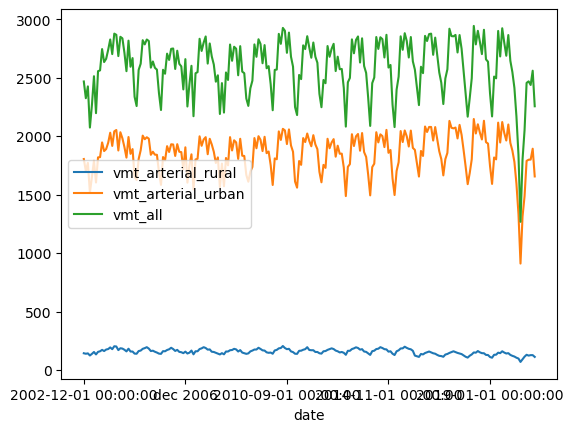

In [20]:
conn_df.plot.line()

<AxesSubplot:>

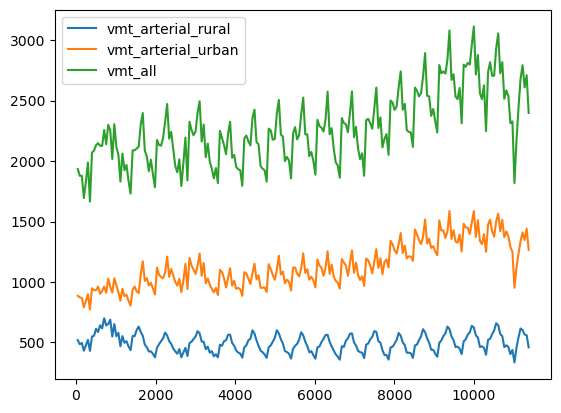

In [21]:
frame[frame['state']=='Utah'].plot.line()

In [22]:
frame.iloc[2500:3000]

,state,vmt_arterial_rural,date,vmt_arterial_urban,vmt_all
2500,Maine,444.0,jan 2006,239.0,1163.0
2501,Massachusetts,213.0,jan 2006,3462.0,4667.0
2502,New Hampshire,265.0,jan 2006,467.0,1035.0
2503,New Jersey,316.0,jan 2006,3787.0,5330.0
2504,New York,1041.0,jan 2006,6276.0,10756.0
...,...,...,...,...,...
2995,Texas,4750.0,2007-06-01 00:00:00,10325.0,19914.0
2996,Alaska,138.0,2007-06-01 00:00:00,172.0,473.0
2997,Arizona,1101.0,2007-06-01 00:00:00,2949.0,5396.0
2998,California,3998.0,2007-06-01 00:00:00,21250.0,29825.0


In [23]:
frame.to_csv('final_state_travel.csv')

In [24]:
frame.tail(50)

,state,vmt_arterial_rural,date,vmt_arterial_urban,vmt_all
11323,Maine,386,2020-11-01 00:00:00,210,1037
11324,Massachusetts,107,2020-11-01 00:00:00,3319,4340
11325,New Hampshire,296,2020-11-01 00:00:00,322,883
11326,New Jersey,202,2020-11-01 00:00:00,4179,5674
11327,New York,839,2020-11-01 00:00:00,4524,7825
11328,Pennsylvania,1670,2020-11-01 00:00:00,3516,7001
11329,Rhode Island,51,2020-11-01 00:00:00,362,491
11330,Vermont,181,2020-11-01 00:00:00,99,445
11331,Delaware,76,2020-11-01 00:00:00,376,649
11332,District of Columbia,0,2020-11-01 00:00:00,167,234
